In [1]:
import numpy as np
import matplotlib.pyplot as plt
from morfo_utils import *
import cv2 as cv
from PrettyPrint import PrettyPrintTree

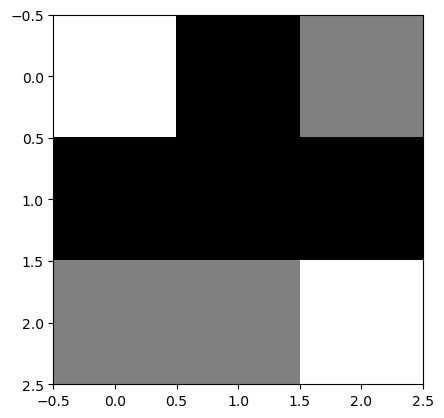

In [2]:
np.random.seed(3)
img = np.random.randint(5, 8, (3, 3))
plt.imshow(img, 'gray')

In [3]:
img

array([[7, 5, 6],
       [5, 5, 5],
       [6, 6, 7]])

In [4]:
# img = np.array([
#     [5, 5, 5],
#     [3, 8, 8],
#     [2, 3, 8]
# ])

# imgABC = np.array([
#     ['A','B','C'],
#     ['D','E','F'],
#     ['G','H','I']
# ])

# img = np.array([
#     [3, 3, 1, 4, 2],
#     [4, 1, 2, 3, 1]
# ])

# imgABC = np.array([
#     ['C', 'D', 'H', 'A', 'F'],
#     ['B', 'I', 'G', 'E', 'J']
# ])

# img = np.array([
#     [6, 2, 4],
#     [0, 2, 2],
#     [5, 3, 6]
# ])

# imgABC = np.array([
#     ['A', 'B', 'C'],
#     ['D', 'E', 'F'],
#     ['G', 'H', 'I']
# ])

# fig, ax1 = plt.subplots(1, 1)
# ax1.imshow(img, 'gray')

# ax1.get_xaxis().set_visible(False)
# ax1.get_yaxis().set_visible(False)

# for i in range(img.shape[0]):
#     for j in range(img.shape[1]):
#         ax1.text(j, i, imgABC[i, j], color='red')


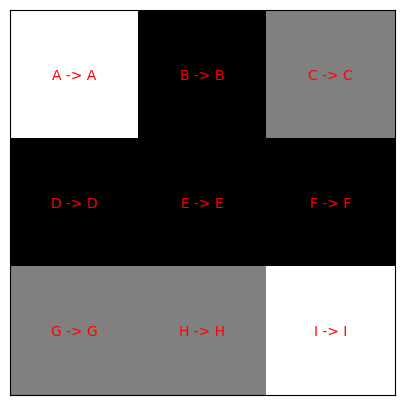

In [5]:
teste = ComponentTree(img, Adjacency8())
# teste.sorted_pixels = np.array([
#         13,  8,  4, 20, 16,
#         21, 14,  7,  0, 23,
#         19, 15, 12,  2, 24,
#          6,  1, 22, 18, 17,
#         11,  5, 10,  9,  3
# ]) # Esse vetor de pixels ordenados é usado apenas para comparação com o resultado da lib skimage
teste.showParents()

### Computar árvore de componentes

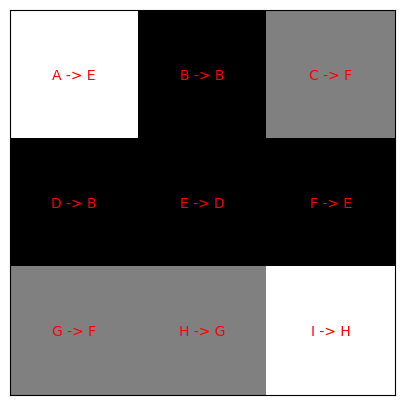

In [6]:
teste.computeTree()
teste.showParents()

### Canonizar pixels

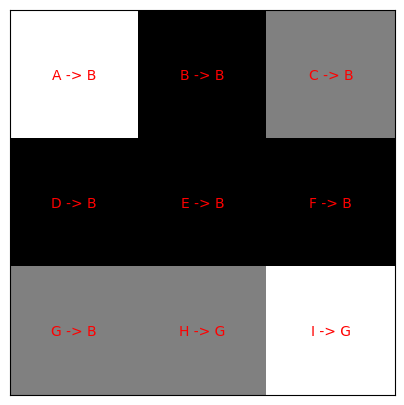

In [7]:
teste.canonize()
teste.showParents()

In [8]:
teste.canonical_pixels

[1, 2, 6, 0, 8]

In [24]:
nodes = {}
for c_index in teste.canonical_pixels:
    if c_index not in nodes.keys():
        c_point = teste.pixel_indexer.index_to_coord(c_index)
        level = teste.image[c_point.row, c_point.col]

        if teste.parent[c_index] == c_index:
            nodes[c_index] = Node(level, c_index)

        else:
            c_parent = teste.parent[c_index]
            nodes[c_index] = Node(level, c_index, nodes[c_parent])
            nodes[c_parent].addChildren(nodes[c_index])

In [25]:
nodes

{1: <morfo_utils.Node at 0x7faf211a9350>,
 2: <morfo_utils.Node at 0x7faf198fb950>,
 6: <morfo_utils.Node at 0x7faf1b529510>,
 0: <morfo_utils.Node at 0x7faf19878190>,
 8: <morfo_utils.Node at 0x7faf1bbdc590>}

In [37]:
pt = PrettyPrintTree(lambda x: x.childrens.values(), lambda x: x.getInfo())
pt(nodes[1])

                  Representant: 1           
                  Parent: 1                 
                  CNPs: []                  
                  Children Nodes: [2, 6, 0] 
         ┌────────────────────┴┬────────────────────┐
 Representant: 2      Representant: 6       Representant: 0    
 Parent: 1            Parent: 1             Parent: 1          
 CNPs: []             CNPs: []              CNPs: []           
 Children Nodes: []   Children Nodes: [8]   Children Nodes: [] 
                               |                               
                       Representant: 8                         
                       Parent: 6                               
                       CNPs: []                                
                       Children Nodes: [] 


In [12]:
teste.sorted_pixels

array([8, 0, 7, 6, 2, 5, 4, 3, 1])

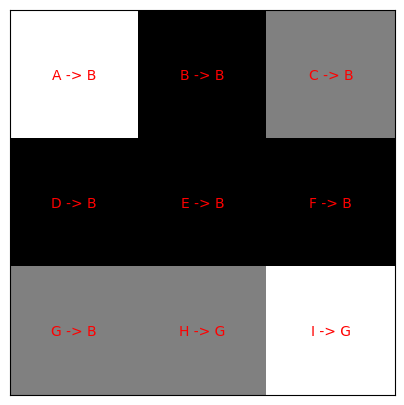

In [13]:
from skimage.morphology import max_tree
P, S = max_tree(img, connectivity=8)
showParents(img, S, P)

In [14]:
teste.parent == P.ravel()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True])

In [15]:
nodes = {}



## TESTE MAÇÃ

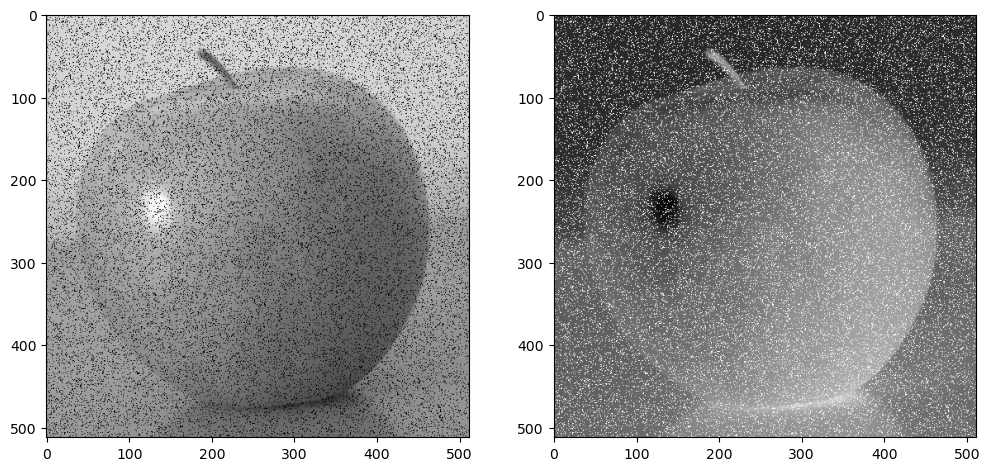

In [16]:
apple = cv.imread('./apple_with_noise.png', 0)
apple_negative = apple.max() - apple

plt.figure(figsize=(12, 12))

plt.subplot(1, 2, 1)
plt.imshow(apple, 'gray')

plt.subplot(1, 2, 2)
plt.imshow(apple_negative, 'gray')

In [17]:
apple_tree = ComponentTree(apple_negative, Adjacency4())
apple_tree.computeTree()
apple_tree.canonize()
leaves = np.where(apple_tree.image >= apple_tree.image.max() - 10, True, False).flatten()
img_podada = np.where(leaves, apple_tree.image.flatten()[apple_tree.parent], apple_negative.flatten()).reshape(apple_tree.image.shape)

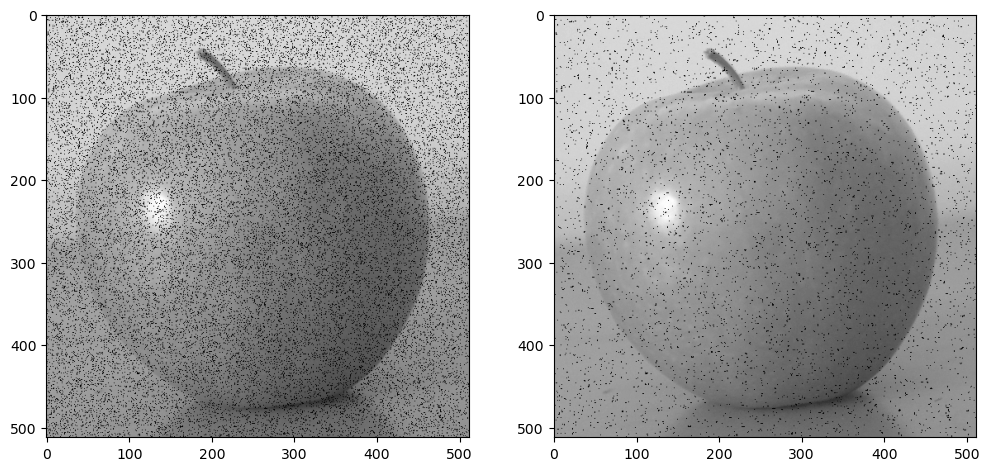

In [18]:
plt.figure(figsize=(12, 12))

plt.subplot(1, 2, 1)
plt.imshow(apple, 'gray')

plt.subplot(1, 2, 2)
plt.imshow(img_podada.max() - img_podada, 'gray')

In [19]:
# for i in range(10):
#     apple_tree.__init__(img_podada, Adjacency4())
#     apple_tree.computeTree()
#     apple_tree.canonize()
#     leaves = np.where(apple_tree.image > apple_tree.image.max() - 10, True, False).flatten()
#     img_podada = np.where(leaves, apple_tree.image.flatten()[apple_tree.parent], img_podada.flatten()).reshape(apple_tree.image.shape)

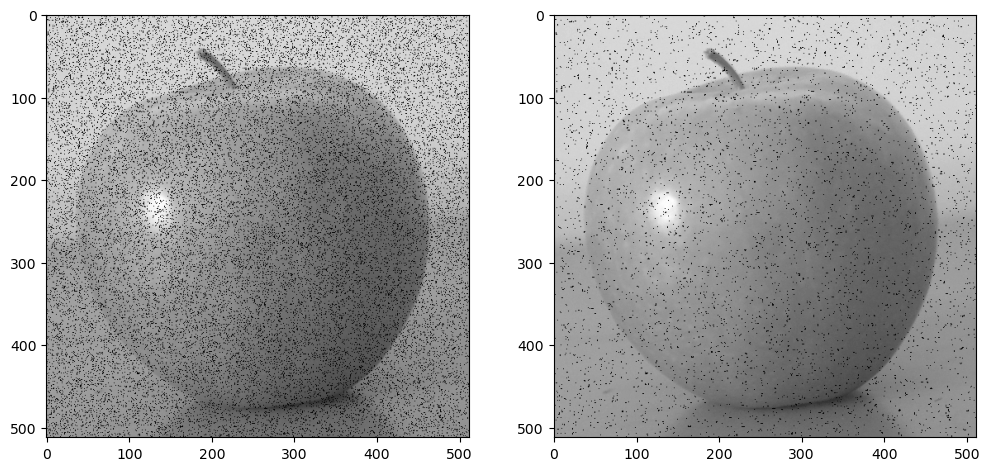

In [20]:
plt.figure(figsize=(12, 12))

plt.subplot(1, 2, 1)
plt.imshow(apple, 'gray')

plt.subplot(1, 2, 2)
plt.imshow(img_podada.max() - img_podada, 'gray')

## Árvore de componentes

Uma árvore contruida sobre os componentes conexos dos conjuntos de niveis de uma imagem

## Max-tree

Estrutura de dados que armazena e manipula uma arvore de componente

# Estudar
- Estrutura ligada
- Percursos em largura e profundidade
- Visitas em pré-ordem, ordem e pós-ordem
- Cálculo de atributo